# 3.1 Churn prediction
Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [1]:
# !kaggle datasets download blastchar/telco-customer-churn
# !unzip telco-customer-churn.zip && rm telco-customer-churn.zip

# 3.2 Data preparation

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Clean column names and categorical variables

In [4]:
# easy way to see all columns in dataframe
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# clean categorical column data as well
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Inspect data

In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
df.totalcharges.describe()

count     7043
unique    6531
top          _
freq        11
Name: totalcharges, dtype: object

In [8]:
df[df.totalcharges == '_'] # _ denotes no amount charged to the customer

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,_,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,_,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,_,no


In [9]:
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges


In [10]:
# totalcharges is an object and not a number
tc = pd.to_numeric(df.totalcharges, errors='coerce') # _ will be replaced with NaN

In [11]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [14]:
df.totalcharges = df.totalcharges.fillna(0)
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges


## Inspect churn variable

In [15]:
df.churn # interested in numbers and not objects

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [16]:
df.churn.value_counts()

churn
no     5174
yes    1869
Name: count, dtype: int64

In [17]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [18]:
df.churn = (df.churn == 'yes').astype(int)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


# 3.3 Setting up the validation framework

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [22]:
(20/80) * 100

25.0

In [23]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

In [24]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [25]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [26]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [27]:
# delete to avoid using it as a feature by mistake - to avoid data leakage and overfitting
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 EDA

In [28]:
df_full_train.reset_index(drop=True, inplace=True)

In [29]:
df_full_train.isnull().sum() # no missing values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Data is imbalanced

In [30]:
df_full_train.churn.value_counts() # get distribution of churn values

churn
0    4113
1    1521
Name: count, dtype: int64

In [31]:
df_full_train.churn.value_counts(normalize=True) 

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

churn rate (fraction of 1s, or customers who leave in the dataset) is ~27%

In [32]:
global_churn_rate = df_full_train.churn.mean() 
round(global_churn_rate, 2)

np.float64(0.27)

- We have 3 numerical variables: tenure, monthlycharges, totalcharges
- The rest are categorical variables. Including seniorcitizen which has 1s and 0s

In [33]:
df_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
dtype: object

In [34]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = list(set(df.columns.to_list()) - set(numerical + ['churn', 'customerid']))

In [35]:
df_full_train[categorical].nunique() # unique values per column

streamingtv         3
internetservice     3
phoneservice        2
seniorcitizen       2
onlinesecurity      3
partner             2
paperlessbilling    2
deviceprotection    3
streamingmovies     3
dependents          2
multiplelines       3
onlinebackup        3
techsupport         3
paymentmethod       4
contract            3
gender              2
dtype: int64

# 3.5 Feature importance: Churn rate and risk ratio
Feature importance analyisis is part of EDA. It is a way of identifying features that affect the target variable. We'll look at:

- Churn rate
- Risk ratio
- Mutual information

## Churn rate
Look at churn rate per group

## Ways of measuring feature importance

1. Churn rate difference: Difference between group variable and global churn rate (or vice versa, doesn't matter): 
    - If difference < 1, global churn rate is higher and the group is less likely to churn 
    - If difference > 1, global churn rate is lower and the group is more likely to churn
    - We are interested in higher differences
    - Shows probaility of churn in an absolute way (+ve or -ve)
1. Risk ratio: Divide the group variable by the global churn rate 
    - If risk ratio < 1, global churn rate is lower and the group is less likely to churn
    - If risk ratio > 1, global churn rate is higher and the group is more likely to churn
    - We are interested in higher risk ratios
    - Shows probaility of churn in a relative way (%)

In [36]:
df_full_train.gender.value_counts()

gender
male      2838
female    2796
Name: count, dtype: int64

In [37]:
# very close with the global churn rate
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

print(f"global_churn_rate: {round(global_churn_rate, 2)}")
print(f"churn_female: {round(churn_female, 2)}")
print(f"churn_male: {round(churn_male, 2)}")

global_churn_rate: 0.27
churn_female: 0.28
churn_male: 0.26


In [38]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [39]:
# churn rate higher than global rate for customers without partners (~6% higher)
churn_has_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()

print(f"global_churn_rate: {round(global_churn_rate, 2)}")
print(f"churn_has_partner: {round(churn_has_partner, 2)} - churn rate difference: {round(churn_has_partner - global_churn_rate, 2)} - risk ratio: {round(churn_has_partner / global_churn_rate, 2)}")
print(f"churn_no_partner: {round(churn_no_partner, 2)} - churn rate difference: {round(churn_no_partner - global_churn_rate, 2)} - risk ratio: {round(churn_no_partner / global_churn_rate, 2)}")

global_churn_rate: 0.27
churn_has_partner: 0.21 - churn rate difference: -0.06 - risk ratio: 0.76
churn_no_partner: 0.33 - churn rate difference: 0.06 - risk ratio: 1.22


## Risk ratio

- No partner group: ~22% more likely to churn than global population
- Has partner group: ~25% less likely to churn than global population
- Female and male groups: same risk to churn as global population

In [40]:
churn_data = {
    'group': ['female', 'male', 'has_partner', 'no_partner'],
    'churn_rate': [churn_female, churn_male, churn_has_partner, churn_no_partner]
}

churn_data_df = pd.DataFrame(churn_data)
churn_data_df['difference'] = churn_data_df['churn_rate'] - global_churn_rate
churn_data_df['risk_ratio'] = churn_data_df['churn_rate'] / global_churn_rate

churn_data_df

,group,churn_rate,difference,risk_ratio
0,female,0.276824,0.006856,1.025396
1,male,0.263214,-0.006755,0.974980
2,has_partner,0.205033,-0.064935,0.759472
3,no_partner,0.329809,0.059841,1.221659


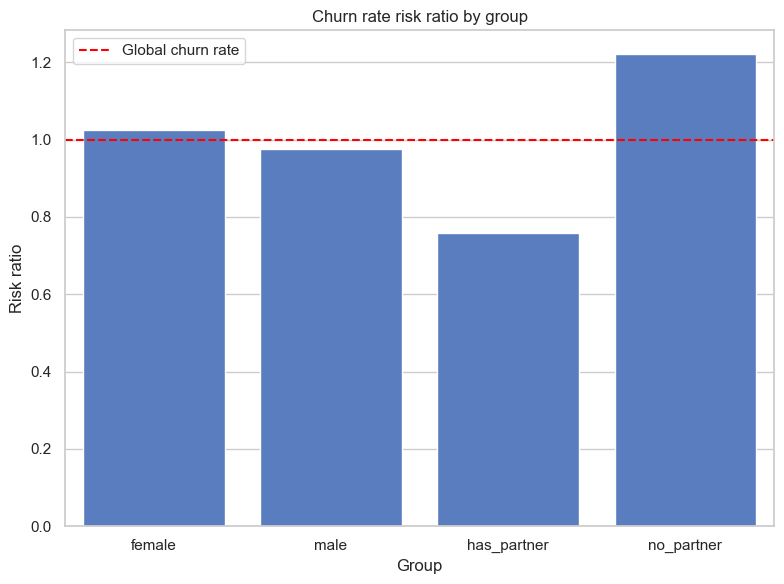

In [41]:
plt.figure(figsize=(8, 6))

sns.set_theme(style="whitegrid", palette="muted")
sns.barplot(x='group', y='risk_ratio', data=churn_data_df)
plt.axhline(1, color='red', linestyle='--', label='Global churn rate')

plt.title('Churn rate risk ratio by group')
plt.ylabel('Risk ratio')
plt.xlabel('Group')

plt.legend()
plt.tight_layout()
plt.show()

- From the data someone who lives with a partner, is male, has dependants and has a two year contract is less likely to churn than someone who lives alone, is female with no dependants and has a month-to-month contract
- More insights can be gained from the data by looking at the risk ratio of the churn rate for each group

In [42]:
for col in categorical:
    df_group = df_full_train.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk_ratio'] = df_group['mean'] / global_churn_rate

    display(df_group)

,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


# 3.6 Feature importance: Mutual information
- Mutual information is a concept from information theory, which measures how much we can learn about one variable if we know the value of another
- It measures the amount of information that is shared between two variables
- It tells us how much we can learn about one variable if we know the value of another variable e.g. how much do we learn about churn if we observe the value of contract
-  In this project, we can think of this as how much do we learn about churn if we have the information from a particular feature. So, it is a measure of the importance of a categorical variable
- Using the `mutual_info_score()` function from sklearn, we can have a way to quantify the relative importance of the features 

[Wikipedia](https://en.wikipedia.org/wiki/Mutual_information)

In [43]:
from sklearn.metrics import mutual_info_score

In [44]:
mutual_info_score(df_full_train.churn, df_full_train.contract) # more important in learning about churn than gender

np.float64(0.0983203874041556)

In [45]:
mutual_info_score(df_full_train.churn, df_full_train.gender) # learn very little

np.float64(0.0001174846211139946)

In [46]:
mutual_info_score(df_full_train.churn, df_full_train.partner) # more important than gender but far less important than partner

np.float64(0.009967689095399745)

In [47]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [48]:
mutual_info = df_full_train[categorical].apply(mutual_info_churn_score)
mutual_info.sort_values(ascending=False).to_frame(name='feature_importance')

,feature_importance
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


# 3.7 Feature importance: Correlation
- A way to measure feature importance in numerical features/variables
- Pearson correlation coefficient: number between -1 (increase in 1 variable leads to decrease in another variable) and 1 (increase in 1 variable leads to increase in another variable)
- If r is correlation coefficient, then the correlation between two variables is:

    - Weak when r is between (0, -0.2) or (0, 0.2)
    - Medium when r is between (-0.3, -0.5) or (0.3, 0.5)
    - Strong when r is between (-0.6, -1.0) or (0.6, 1.0]

- Can use absolute value if not interested in direction

[Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

- From the data:
    - The more a customer stays with the telco the less likely they are to churn (medium -ve correlation)
    - The more a customer pays (totalcharges) the less likely they are to churn (weak -ve correlation)
    - The higher the monthly charges the more likely a customer will churn (weak +ve correlation)

In [49]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## Tenure

In [50]:
df_full_train.tenure.max()

np.int64(72)

In [51]:
df_full_train[df_full_train.tenure <= 2].churn.mean() # very high churn rate

np.float64(0.5953420669577875)

In [52]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean() # lower churn rate than <=2 months but higher than longer tenure

np.float64(0.3994413407821229)

In [53]:
df_full_train[df_full_train.tenure >= 12].churn.mean() # much lower

np.float64(0.17986881937436933)

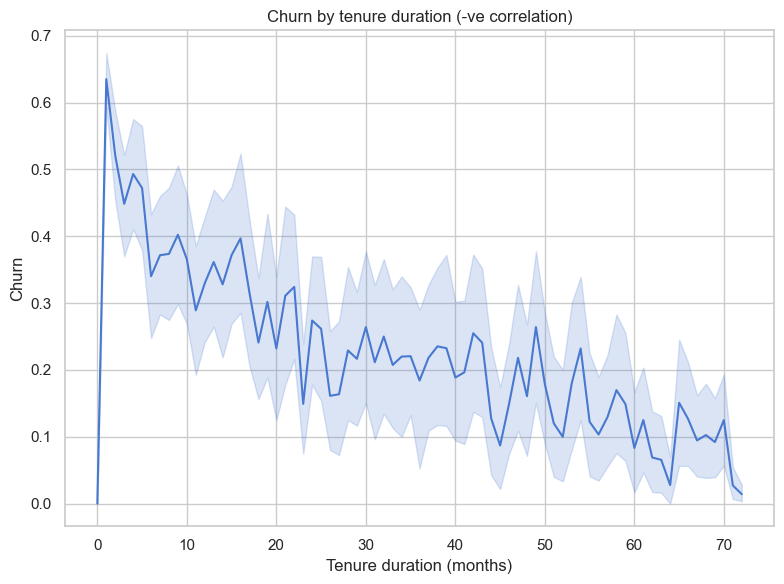

In [54]:
# not certain if this is the best plot -> barplot would definitely be better
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid", palette="muted")

sns.lineplot(x='tenure', y='churn', data=df_full_train)

plt.ylabel('Churn')
plt.xlabel('Tenure duration (months)')
plt.title('Churn by tenure duration (-ve correlation)')

plt.tight_layout()
plt.show()

## Monthly charges

In [55]:
df_full_train.monthlycharges.describe()

count    5634.000000
mean       64.779127
std        30.104993
min        18.250000
25%        35.400000
50%        70.375000
75%        89.850000
max       118.650000
Name: monthlycharges, dtype: float64

In [56]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean() # low churn rate

np.float64(0.08795411089866156)

In [57]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean() # mid churn rate when compared with the 2

np.float64(0.18340943683409436)

In [58]:
df_full_train[df_full_train.monthlycharges >= 50].churn.mean() # higher churn rate

np.float64(0.3248223216635957)

In [59]:
monthly_charges_churn_rate = [df_full_train[df_full_train.monthlycharges <= 20].churn.mean(), 
                              df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean(), 
                              df_full_train[df_full_train.monthlycharges >= 50].churn.mean()]
monthly_charges_groups = ['<= 20', '> 20, <= 50', '> 50']

monthly_charges_dict = {
    "monthly_charges_groups": monthly_charges_groups,
    "churn_rate": monthly_charges_churn_rate,
}

monthly_charges_df = pd.DataFrame(monthly_charges_dict)

monthly_charges_df

,monthly_charges_groups,churn_rate
0,<= 20,0.087954
1,"> 20, <= 50",0.183409
2,> 50,0.324822


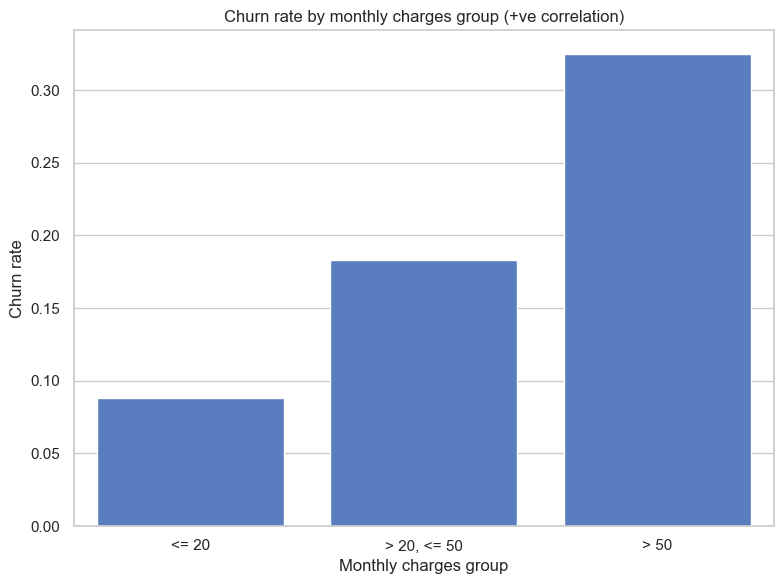

In [60]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid", palette="muted")

sns.barplot(x="monthly_charges_groups", y="churn_rate", data=monthly_charges_df)

plt.title('Churn rate by monthly charges group (+ve correlation)')
plt.ylabel('Churn rate')
plt.xlabel('Monthly charges group')

plt.tight_layout()
plt.show()

# 3.8 One-hot encoding
Used to encode categorical variables into numerical variables

In [61]:
from sklearn.feature_extraction import DictVectorizer

In [62]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [63]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [64]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [65]:
dv.transform(dicts) # won't transform tenure as its a numeric variable

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [66]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]

{'streamingtv': 'yes',
 'internetservice': 'fiber_optic',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'onlinesecurity': 'yes',
 'partner': 'yes',
 'paperlessbilling': 'yes',
 'deviceprotection': 'yes',
 'streamingmovies': 'yes',
 'dependents': 'yes',
 'multiplelines': 'yes',
 'onlinebackup': 'yes',
 'techsupport': 'yes',
 'paymentmethod': 'electronic_check',
 'contract': 'two_year',
 'gender': 'female',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [67]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [68]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [69]:
X_train[0].astype(list)

array([0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0,
       115.5, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
       1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 1.0, 72.0, 8425.15], dtype=object)

In [70]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

# 3.9 Logistic regression
- Logistic regression is very similar to linear regression, but instead of predicting a single number, we predict a probability that the input belongs to a certain class
- It does this by using a special form of the logistic function called the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) to map the output/score to a value (probability) between 0 and 1
- Both linear and logistic regression are called linear models because they use the dot product, also called the linear operator in linear algebra
- Linear models are good because they're fast to train and use

In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(-6), sigmoid(0), sigmoid(6)

(np.float64(0.0024726231566347743),
 np.float64(0.5),
 np.float64(0.9975273768433653))

In [72]:
z = np.linspace(-6, 6, 50)
z

array([-6.        , -5.75510204, -5.51020408, -5.26530612, -5.02040816,
       -4.7755102 , -4.53061224, -4.28571429, -4.04081633, -3.79591837,
       -3.55102041, -3.30612245, -3.06122449, -2.81632653, -2.57142857,
       -2.32653061, -2.08163265, -1.83673469, -1.59183673, -1.34693878,
       -1.10204082, -0.85714286, -0.6122449 , -0.36734694, -0.12244898,
        0.12244898,  0.36734694,  0.6122449 ,  0.85714286,  1.10204082,
        1.34693878,  1.59183673,  1.83673469,  2.08163265,  2.32653061,
        2.57142857,  2.81632653,  3.06122449,  3.30612245,  3.55102041,
        3.79591837,  4.04081633,  4.28571429,  4.53061224,  4.7755102 ,
        5.02040816,  5.26530612,  5.51020408,  5.75510204,  6.        ])

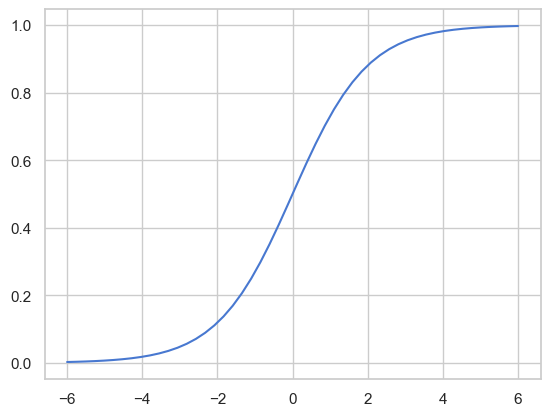

In [73]:
plt.plot(z, sigmoid(z))

In [74]:
def dot(x1, w):
    n = len(x1)

    res = 0

    for j in range(n):
        res += w[j] * x1[j]

    return res

def linear_regression(xi):
    return w0 + dot(xi, w)

def logistic_regression(xi):
    return sigmoid(linear_regression(xi))

# 3.10 Training logistic regression with scikit-learn

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train) # train the model

/Users/sheilambadi/Documents/Professional growth/Data Science/machine-learning-zoomcamp/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
model.intercept_[0] # bias term

np.float64(-0.10892332928453427)

In [78]:
model.coef_[0].round(3) # model weights

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.062, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [79]:
model.predict(X_train) # hard predictions (sigmoid appled)

array([0, 1, 1, ..., 1, 0, 1])

In [80]:
model.predict_proba(X_train) # soft predictions (score)

array([[0.9044586 , 0.0955414 ],
       [0.32086109, 0.67913891],
       [0.36647449, 0.63352551],
       ...,
       [0.46811843, 0.53188157],
       [0.95735368, 0.04264632],
       [0.30144747, 0.69855253]])

In [81]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00902924, 0.20485706, 0.21251995, ..., 0.13660855, 0.7995909 ,
       0.83722192])

In [82]:
churn_decision = y_pred >= 0.5 # default for sklearn predict is also 0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [83]:
# to select customers that will churn and send promotional email with discount
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [84]:
# get accuracy of the model
(y_val == churn_decision.astype(int)).mean() # 80% accuracy

np.float64(0.8034066713981547)

In [85]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

df_pred

,probability,prediction,actual,correct
0,0.009029,0,0,True
1,0.204857,0,0,True
2,0.212520,0,0,True
3,0.542965,1,1,True
4,0.214049,0,0,True
...,...,...,...,...
1404,0.313965,0,0,True
1405,0.039456,0,1,False
1406,0.136609,0,0,True
1407,0.799591,1,1,True


In [86]:
df_pred.correct.astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
1404    1
1405    0
1406    1
1407    1
1408    1
Name: correct, Length: 1409, dtype: int64

In [87]:
df_pred.correct.mean() # correct = 1, incorrect = 0

np.float64(0.8034066713981547)

# 4.2 Accuracy & Dummy Model

**Accuracy:** Tells us about fraction of correct predictions

In [89]:
# accuracy
(y_val == churn_decision).sum() / len(y_val)

np.float64(0.8034066713981547)

## Evaluate the model on different thresholds

In [106]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)

scores = []

for threshold in thresholds:
    churn_decision = y_pred >= threshold
    score  =  accuracy_score(y_val, churn_decision)

    print(f"Threshold: {threshold:.2f}, Score: {score:.3f}")
    scores.append(score)

Threshold: 0.00, Score: 0.274
Threshold: 0.05, Score: 0.509
Threshold: 0.10, Score: 0.591
Threshold: 0.15, Score: 0.666
Threshold: 0.20, Score: 0.710
Threshold: 0.25, Score: 0.739
Threshold: 0.30, Score: 0.760
Threshold: 0.35, Score: 0.772
Threshold: 0.40, Score: 0.785
Threshold: 0.45, Score: 0.793
Threshold: 0.50, Score: 0.803
Threshold: 0.55, Score: 0.801
Threshold: 0.60, Score: 0.795
Threshold: 0.65, Score: 0.786
Threshold: 0.70, Score: 0.765
Threshold: 0.75, Score: 0.744
Threshold: 0.80, Score: 0.735
Threshold: 0.85, Score: 0.726
Threshold: 0.90, Score: 0.726
Threshold: 0.95, Score: 0.726
Threshold: 1.00, Score: 0.726


In [107]:
# Find the index of the highest score
max_score_index = np.argmax(scores)
max_score_threshold = thresholds[max_score_index]
max_score = scores[max_score_index]
max_score_threshold, max_score

(np.float64(0.5), 0.8034066713981547)

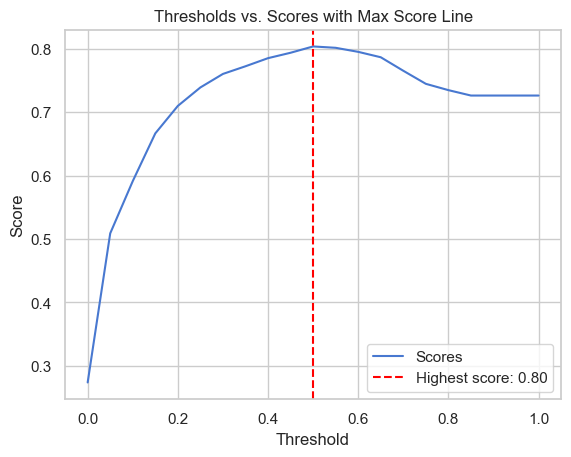

In [108]:
# Plot the thresholds and scores
plt.plot(thresholds, scores, label='Scores')

# Draw a vertical line at the threshold with the highest score
plt.axvline(x=max_score_threshold, color='red', linestyle='--', label=f'Highest score: {max_score:.2f}')

# Add labels and a legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Thresholds vs. Scores with Max Score Line')
plt.legend()

### Interprating first and last threshold

- Thresold of 1 predicts that all customers are non-churning. The model does actually perform well as 72.6% accuracy. This is our **dummy model**
- Accuracy isn't the best measure for evaluating the model. It shows us that we only had an increase of ~7% in churn rate when we compare our model to the dummy model
- Threshold of 0 predicts that all customers are churning. The score is really bad at 27.4% accuracy. This is the lowest score in the list. The score is low because we have a lot more non-churning customers than churning customers
- The difference in accuracy between the two is because of **class imbalance**. We have more non-churning vs churning customers. The ratio is ~3:1
- Accuracy is a score thats misleading for imbalanced datasets. If we predict the majority class using a dummy model, it does make it appear that its good enough
- There are better evaluation metrics for imbalanced datasets

In [110]:
from collections import Counter

# thresold of 1 predicts that all customers are non-churning
Counter(y_pred > 1)

Counter({np.False_: 1409})

In [114]:
(y_val == 0).mean()

np.float64(0.7260468417317246)

In [111]:
Counter(y_pred > 0)

Counter({np.True_: 1409})

In [115]:
(y_val == 1).mean()

np.float64(0.2739531582682754)

In [112]:
# more non-churning than churning users
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})